In [1]:
import algorithmx
import networkx as nx
import random
from random import randint

In [3]:
def dijkstra(G, source, target):
    Q = set(G.nodes)                    # Q = unvisited vertices
    dist = {v: float('inf') for v in Q} # dists = infinity
    prev = {v: float('inf') for v in Q} # prevs = infinity
    dist[source] = 0                    # source dist = 0

    while len(Q) > 0:               # until all vertices visited
        d = {i: dist[i] for i in Q} # d = subset of dist still unvisited
        u = min(d, key=d.get)       # u = nearest neighbor
        Q.discard(u)                # remove from Q, since visiting
        
        for v, e in G.adj[u].items():   # for neighbors of u
            alt = dist[u] + e['weight'] # what if we took u instead?
            if alt < dist[v]:           # if shorter, redirect path
                dist[v] = alt
                prev[v] = u

    # reconstruct path
    path = [target]
    while source not in path: path.append(prev[path[-1]])
    path.reverse()
    return path



# ALL CODE BELOW IS FROM NETWORKX DOCUMENTATION
random.seed(436) #\\
canvas = algorithmx.jupyter_canvas(buttons=True)
canvas.size((500, 400)) #\\
# Generate random graph with random edge weights
G = nx.newman_watts_strogatz_graph(18, 2, 0.4, seed=537)
nx.set_edge_attributes(G, {e: randint(1, 20) for e in G.edges}, 'weight') #\\
# Add nodes and edges with weight labels
canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add().label().text(lambda e: G.edges[e]['weight'])
canvas.pause(1) #\\
# Select source and target
source = 0
target = 8
canvas.node(source).color('green').highlight().size('1.25x')
canvas.node(target).color('red').highlight().size('1.25x')
canvas.pause(1.5) #\\
# Run Dijkstra's shortest path algorithm
# path = nx.dijkstra_path(G, source, target)
path = dijkstra(G, source, target) #\\
# Animate the algorithm
path_length = 0
for i in range(len(path) - 1):
    u, v = path[i], path[i + 1] #\\
    # Update path length
    path_length += G[u][v]['weight'] #\\
    # Traverse edge
    canvas.edge((u, v)).traverse().color('blue')
    canvas.pause(0.4) #\\
    # Make the next node blue, unless it's the target
    if v != target:
        canvas.node(v).color('blue') #\\
    # Add a label to indicate current path length
    canvas.node(v).label('path').add().color('blue').text(path_length)
    canvas.pause(0.4) #\\
canvas

JupyterClient(events=['{"type": "update", "queue": "default", "data": {"attributes": {"size": [500, 400]}, "an…

In [147]:
import time

testTimes = {"our_dijkstra": [], "nx_dijkstra": [], "nx_bellman": [], "nx_astar": []}

for i in range(2, 100):
    source = 0
    target = round(i/2)
    
    G = nx.newman_watts_strogatz_graph(i, 2, 0.4, seed=537)
    nx.set_edge_attributes(G, {e: randint(1, 20) for e in G.edges}, 'weight')

    # NETWORKX BUILTIN DIJKSTRA
    tic = time.time()
    nx_path = nx.dijkstra_path(G, source, target)
    testTimes["nx_dijkstra"].append(time.time() - tic)
    
    # Our implemented Dijkstra
    tic = time.time()
    our_path = dijkstra(G, source, target)
    testTimes["our_dijkstra"].append(time.time() - tic)
    
    # NETWORKX BUILTIN BELLMAN FORD
    tic = time.time()
    nxbf = nx.bellman_ford_path(G, source, target)
    testTimes["nx_bellman"].append(time.time() - tic)
    
    # NETWORKX BUILTIN BELLMAN FORD
    tic = time.time()
    nxas = nx.astar_path(G, source, target)
    testTimes["nx_astar"].append(time.time() - tic)
    
    assert our_path # check our path exists
    assert nx_path  # does nx's path exist?
    assert our_path == nx_path # are they equal?

Text(0, 0.5, 'Execution time (seconds)')

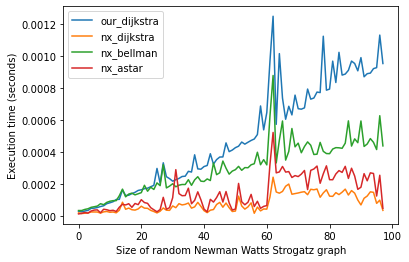

In [148]:
import matplotlib.pyplot as plt
for d in testTimes:
    plt.plot(testTimes[d], label=d)

plt.legend()
plt.xlabel('Size of random Newman Watts Strogatz graph')
plt.ylabel('Execution time (seconds)')